In [ ]:
!pip install pycaret==2.3.10 from tusted host

In [ ]:
!pip install tensorflow scikit-learn pandas numpy

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.8661 - loss: 0.4756
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.8786 - loss: 0.3560
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.8822 - loss: 0.3258
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.8832 - loss: 0.2783
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.9111 - loss: 0.1711
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 1.0000 - loss: 0.0524
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 1.0000 - loss: 0.0182
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 1.0000 - loss: 0.0094
Epoch 9/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 1.0000 - loss: 0.0057
Epoch 10/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 1.0000 - loss: 0.0040
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Accuracy: 0.8785224676313785
AUC: 0.5659477647
F1 Score: 0.01238390092879257
Re

<Axes: >

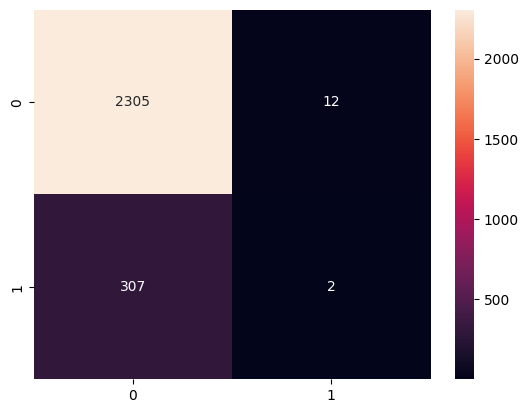

In [ ]:
import pandas as pd

# Load training data
train_data = pd.read_excel('/content/sample_data/trainset_for_ml.xlsx')  # Replace 'train_data.xlsx' with your training data file name
X_train = train_data.drop('loan_status_1_0', axis=1)  # Replace 'default_ind' with your target variable column name
y_train = train_data['loan_status_1_0']

# Load testing data
test_data = pd.read_excel('/content/sample_data/testset_for_ml.xlsx')  # Replace 'test_data.xlsx' with your testing data file name
X_test = test_data.drop('loan_status_1_0', axis=1)  # Replace 'default_ind' with your target variable column name
y_test = test_data['loan_status_1_0']

# Handle categorical features (if any) - Example using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure both datasets have the same columns after one-hot encoding
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Scale numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input data for BiLSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the BiLSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test set
y_pred_proba = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_proba > 0.5).astype(int)
y_pred = y_pred.reshape(-1,1)
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(y_pred, columns=['loan_status_1_0'], index=test_data.index)

# You can save the predictions to a file if needed
#predictions_df.to_excel('E:/SME_Scorecard/loan_predictions.xlsx')
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix

# Assuming you have y_test and y_pred from the previous code
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# Calculate AUC
# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba.flatten()) # Flatten y_pred_proba to 1D array
print(f"AUC: {auc:.10f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Calculate Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 24s 83ms/step - accuracy: 0.8650 - loss: 0.4766
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.8816 - loss: 0.3492
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.8836 - loss: 0.3238
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.8740 - loss: 0.2944
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.9221 - loss: 0.1742
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 1.0000 - loss: 0.0514
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 1.0000 - loss: 0.0175
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 1.0000 - loss: 0.0093
Epoch 9/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - accuracy: 1.0000 - loss: 0.0056
Epoch 10/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 1.0000 - loss: 0.0038
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
Accuracy: 0.9212448860315605
AUC: 0.5856360689
F1 Score: 0.0
Recall: 0.0
Conf

<Axes: >

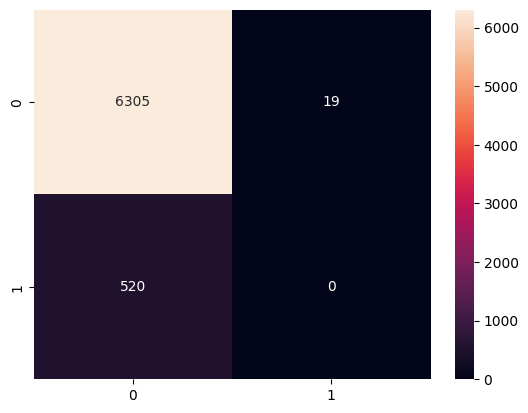

In [ ]:
import pandas as pd

# Load training data
train_data = pd.read_excel('/content/sample_data/trainset_for_ml.xlsx')  # Replace 'train_data.xlsx' with your training data file name
X_train = train_data.drop('loan_status_1_0', axis=1)  # Replace 'default_ind' with your target variable column name
y_train = train_data['loan_status_1_0']

# Load testing data
test_data = pd.read_excel('/content/sample_data/validationset_for_ml.xlsx')  # Replace 'test_data.xlsx' with your testing data file name
X_test = test_data.drop('loan_status_1_0', axis=1)  # Replace 'default_ind' with your target variable column name
y_test = test_data['loan_status_1_0']

# Handle categorical features (if any) - Example using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure both datasets have the same columns after one-hot encoding
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Scale numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input data for BiLSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the BiLSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

model = Sequential()
model.add(Bidirectional(LSTM(50), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test set
y_pred_proba = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_proba > 0.5).astype(int)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_proba > 0.5).astype(int)
y_pred = y_pred.reshape(-1,1)
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(y_pred, columns=['loan_status_1_0'], index=test_data.index)

# You can save the predictions to a file if needed
#predictions_df.to_excel('E:/SME_Scorecard/loan_predictions.xlsx')
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix

# Assuming you have y_test and y_pred from the previous code
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# Calculate AUC
# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba.flatten()) # Flatten y_pred_proba to 1D array
print(f"AUC: {auc:.10f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Calculate Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(X_train.shape)
print(y_train.shape)

(6119, 1, 12984)
(6119,)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Load training data
train_data = pd.read_excel('/content/sample_data/trainset_for_ml.xlsx')
X_train = train_data.drop('loan_status_1_0', axis=1)
y_train = train_data['loan_status_1_0']

# Load testing data
test_data = pd.read_excel('/content/sample_data/testset_for_ml.xlsx')
X_test = test_data.drop('loan_status_1_0', axis=1)
y_test = test_data['loan_status_1_0']

# Handle categorical features (if any) - Example using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure both datasets have the same columns after one-hot encoding
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)
# Scale numerical features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the shape of X_train
print(X_train.shape)

# Reshape data to 2D only if it has more than 2 dimensions
if len(X_train.shape) > 2:
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

# Define and train models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print(f"AUC: {auc:.10f}")
    print("-" * 20)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

(6119, 8766)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Random Forest
Accuracy: 0.8823305407463823
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2317
           1       0.00      0.00      0.00       309

    accuracy                           0.88      2626
   macro avg       0.44      0.50      0.47      2626
weighted avg       0.78      0.88      0.83      2626

AUC: 0.5000000000
--------------------
Confusion Matrix:
[[2317    0]
 [ 309    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Gradient Boosting
Accuracy: 0.8823305407463823
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2317
           1       0.00      0.00      0.00       309

    accuracy                           0.88      2626
   macro avg       0.44      0.50      0.47      2626
weighted avg       0.78      0.88      0.83      2626

AUC: 0.5000000000
--------------------
Confusion Matrix:
[[2317    0]
 [ 309    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Logistic Regression
Accuracy: 0.8823305407463823
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2317
           1       0.00      0.00      0.00       309

    accuracy                           0.88      2626
   macro avg       0.44      0.50      0.47      2626
weighted avg       0.78      0.88      0.83      2626

AUC: 0.5000000000
--------------------
Confusion Matrix:
[[2317    0]
 [ 309    0]]
Model: Decision Tree
Accuracy: 0.8522467631378522
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2317
           1       0.16      0.06      0.08       309

    accuracy                           0.85      2626
   macro avg       0.52      0.51      0.50      2626
weighted avg       0.80      0.85      0.82      2626

AUC: 0.5081939736
--------------------
Confusion Matrix:
[[2220   97]
 [ 291   18]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: SVM
Accuracy: 0.8823305407463823
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2317
           1       0.00      0.00      0.00       309

    accuracy                           0.88      2626
   macro avg       0.44      0.50      0.47      2626
weighted avg       0.78      0.88      0.83      2626

AUC: 0.5000000000
--------------------
Confusion Matrix:
[[2317    0]
 [ 309    0]]
Model: K-Nearest Neighbors
Accuracy: 0.876999238385377
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2317
           1       0.29      0.03      0.06       309

    accuracy                           0.88      2626
   macro avg       0.59      0.51      0.50      2626
weighted avg       0.82      0.88      0.83      2626

AUC: 0.5110021189
--------------------
Confusion Matrix:
[[2293   24]
 [ 299   10]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Naive Bayes
Accuracy: 0.11766945925361767
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2317
           1       0.12      1.00      0.21       309

    accuracy                           0.12      2626
   macro avg       0.06      0.50      0.11      2626
weighted avg       0.01      0.12      0.02      2626

AUC: 0.5000000000
--------------------
Confusion Matrix:
[[   0 2317]
 [   0  309]]
Model: XGBoost
Accuracy: 0.8724295506473724
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2317
           1       0.09      0.01      0.02       309

    accuracy                           0.87      2626
   macro avg       0.49      0.50      0.47      2626
weighted avg       0.79      0.87      0.82      2626

AUC: 0.4985962766
--------------------
Confusion Matrix:
[[2288   29]
 [ 306    3]]
[LightGBM] [Info] Number of positive: 7

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Assuming you have your data loaded and preprocessed in X_train, y_train, X_test, y_test

# Define base models
model1 = RandomForestClassifier()
model2 = GradientBoostingClassifier()

# Fit base models on the training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Make predictions on the test data
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

# Create a new dataset with predictions from base models
stacked_predictions = pd.DataFrame({'pred1': pred1, 'pred2': pred2})

# Define meta-model
meta_model = LogisticRegression()

# Fit meta-model on stacked predictions
meta_model.fit(stacked_predictions, y_test)

# Make final predictions using meta-model
final_predictions = meta_model.predict(stacked_predictions)

# Evaluate performance
accuracy = accuracy_score(y_test, final_predictions)
report = classification_report(y_test, final_predictions)
auc = roc_auc_score(y_test, final_predictions)

print(f"Stacked Model Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"AUC: {auc:.10f}")

Stacked Model Accuracy: 0.8823305407463823
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2317
           1       0.00      0.00      0.00       309

    accuracy                           0.88      2626
   macro avg       0.44      0.50      0.47      2626
weighted avg       0.78      0.88      0.83      2626

AUC: 0.5000000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score


# Assuming you have your data loaded in X_train, y_train, X_test, y_test

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred_proba = model.predict(X_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8358 - loss: 0.4630 - val_accuracy: 0.8823 - val_loss: 0.4494
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9075 - loss: 0.1983 - val_accuracy: 0.8819 - val_loss: 0.3688
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9961 - loss: 0.0167 - val_accuracy: 0.8823 - val_loss: 0.3803
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8823 - val_loss: 0.3701
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 1.0000 - loss: 8.2463e-04 - val_accuracy: 0.8823 - val_loss: 0.3712
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.8823 - val_loss: 0.3719
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 1.0000 - loss: 3.2867e-04 - val_accuracy: 0.8823 - val_loss: 0.3774
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 1.0000 - loss: 2.5851e-0

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), # specify the number of neurons and layers
                    activation='relu',
                    solver='adam',
                    max_iter=1000,
                    random_state=42)

# Train the model
mlp.fit(X_train.reshape(X_train.shape[0], -1), y_train) # Reshape X_train to 2D

# Make predictions on the test set
y_pred_mlp = mlp.predict(X_test.reshape(X_test.shape[0], -1)) # Reshape X_test to 2D

# Calculate accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp}")

MLP Accuracy: 0.9209526592635885


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),
                    activation='relu',
                    solver='adam',
                    max_iter=1000,
                    random_state=42)

# Train the model
mlp.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Get predicted probabilities
y_pred_proba_mlp = mlp.predict_proba(X_test.reshape(X_test.shape[0], -1))[:, 1]

# Calculate AUC
auc_mlp = roc_auc_score(y_test, y_pred_proba_mlp)
print(f"MLP AUC: {auc_mlp}")

MLP AUC: 0.5967130710845132
